# US Corporate AAA vs. BBB bond total returns

In [2]:
library(DBI)
library(plutoDbR)
library(plutoR)
library(tidyverse)
options("scipen"=999)
options(stringsAsFactors = FALSE)
source("/usr/share/pluto/config.R")
source("/usr/share/pluto/goofy/plot.common.R")
source("/usr/share/pluto/goofy/misc.common.R")

library(ggthemes)
library(reshape2)
library(quantmod)
library(lubridate)
library(ggrepel)
library(PerformanceAnalytics)

options(repr.plot.width=16, repr.plot.height=8)

#initialize
fred <- Fred()

In [17]:
# BAMLCC0A1AAATRIV: ICE BofAML US Corp AAA Total Return Index Value
# BAMLCC0A4BBBTRIV: ICE BofAML US Corp BBB Total Return Index Value
# BAMLCC0A0CMTRIV: ICE BofAML US Corp Master Total Return Index Value

startDate <- as.Date("1988-01-01")

aaaTs <- fred$Meta() %>% 
    inner_join(fred$TimeSeries()) %>%
    filter(TICKER == 'BAMLCC0A1AAATRIV') %>%
    select(TIME_STAMP, VAL) %>%
    collect() %>%
    mutate(TIME_STAMP = as.Date(TIME_STAMP))

bbbTs <- fred$Meta() %>% 
    inner_join(fred$TimeSeries()) %>%
    filter(TICKER == 'BAMLCC0A4BBBTRIV') %>%
    select(TIME_STAMP, VAL) %>%
    collect() %>%
    mutate(TIME_STAMP = as.Date(TIME_STAMP))

allTs <- fred$Meta() %>% 
    inner_join(fred$TimeSeries()) %>%
    filter(TICKER == 'BAMLCC0A0CMTRIV') %>%
    select(TIME_STAMP, VAL) %>%
    collect() %>%
    mutate(TIME_STAMP = as.Date(TIME_STAMP))

In [20]:
#calculate returns

#daily
bondRetsDaily <- na.omit(merge(dailyReturn(xts(aaaTs$VAL, aaaTs$TIME_STAMP)), dailyReturn(xts(bbbTs$VAL, bbbTs$TIME_STAMP)), dailyReturn(xts(allTs$VAL, allTs$TIME_STAMP))))
names(bondRetsDaily) <- c('AAA', 'BBB', 'AGG')

#annual
bondRetsAnnual <- 100*na.omit(merge(annualReturn(xts(aaaTs$VAL, aaaTs$TIME_STAMP)), annualReturn(xts(bbbTs$VAL, bbbTs$TIME_STAMP)), annualReturn(xts(allTs$VAL, allTs$TIME_STAMP))))
names(bondRetsAnnual) <- c('AAA', 'BBB', 'AGG')

bondRetsAnnual <- bondRetsAnnual[-1,]
bondRetsAnnual <- bondRetsAnnual[-nrow(bondRetsAnnual),]

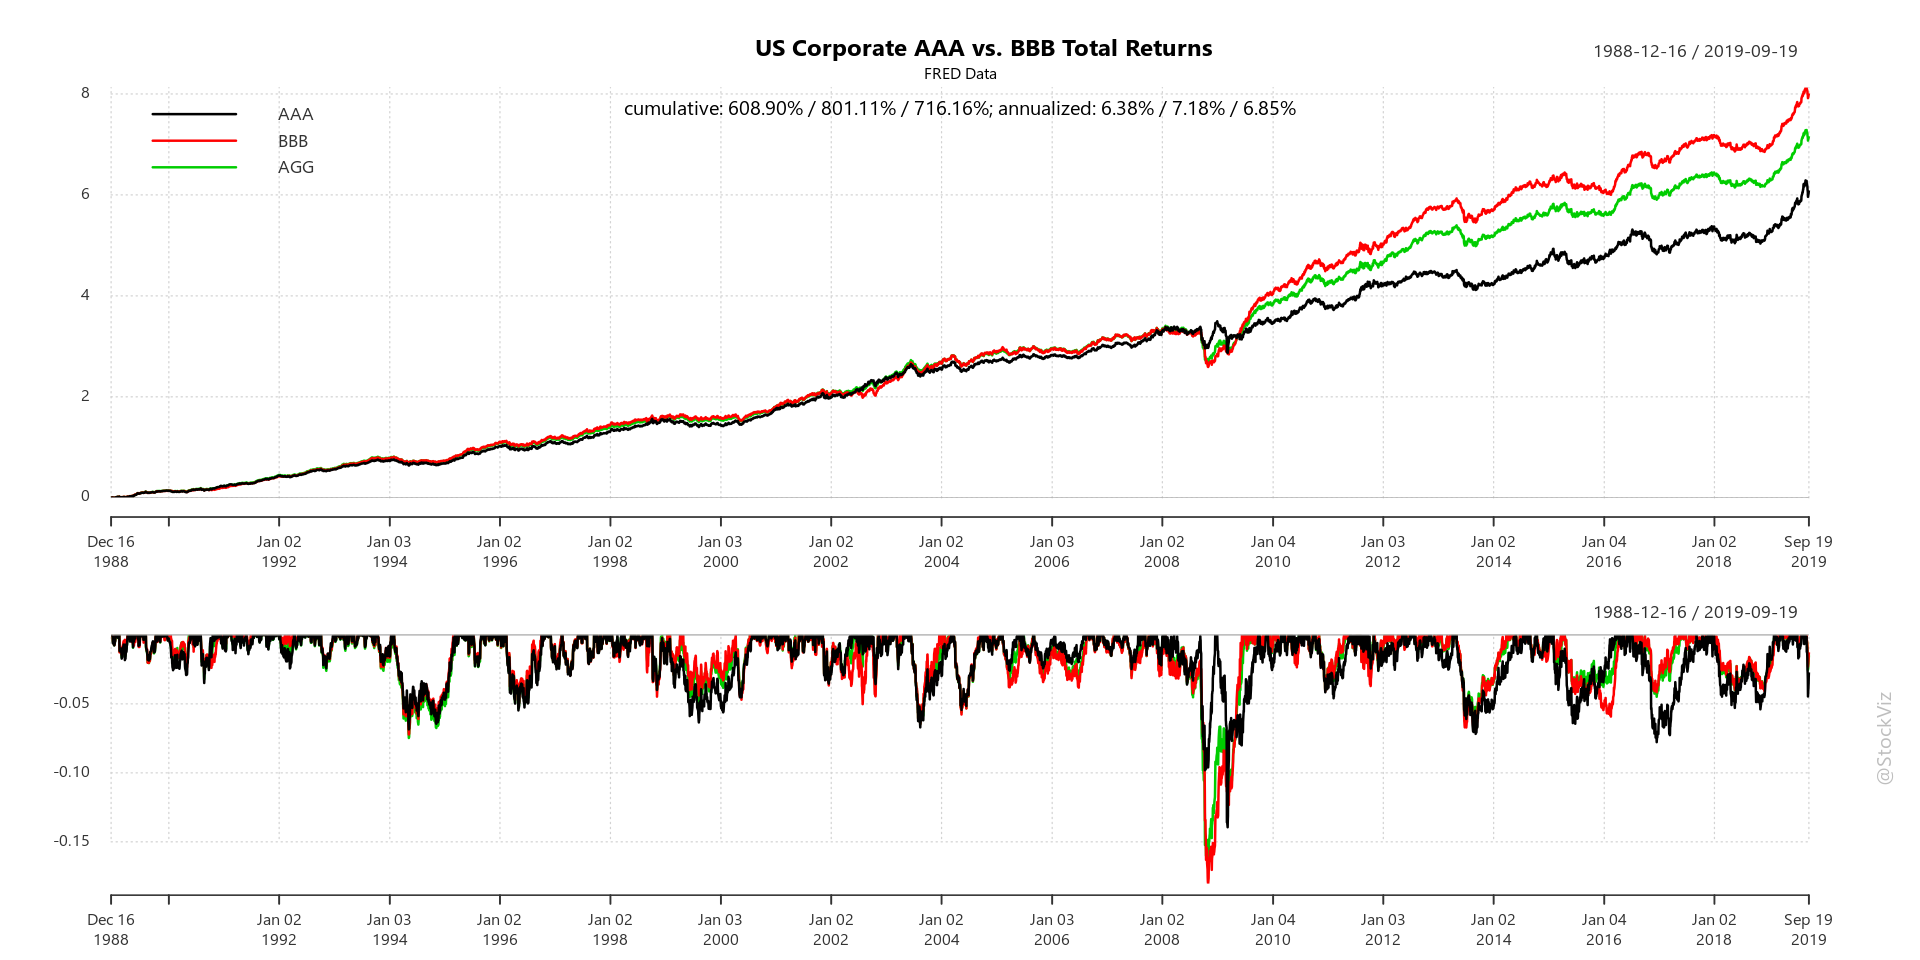

In [21]:
Common.PlotCumReturns(bondRetsDaily, "US Corporate AAA vs. BBB Total Returns", "FRED Data")

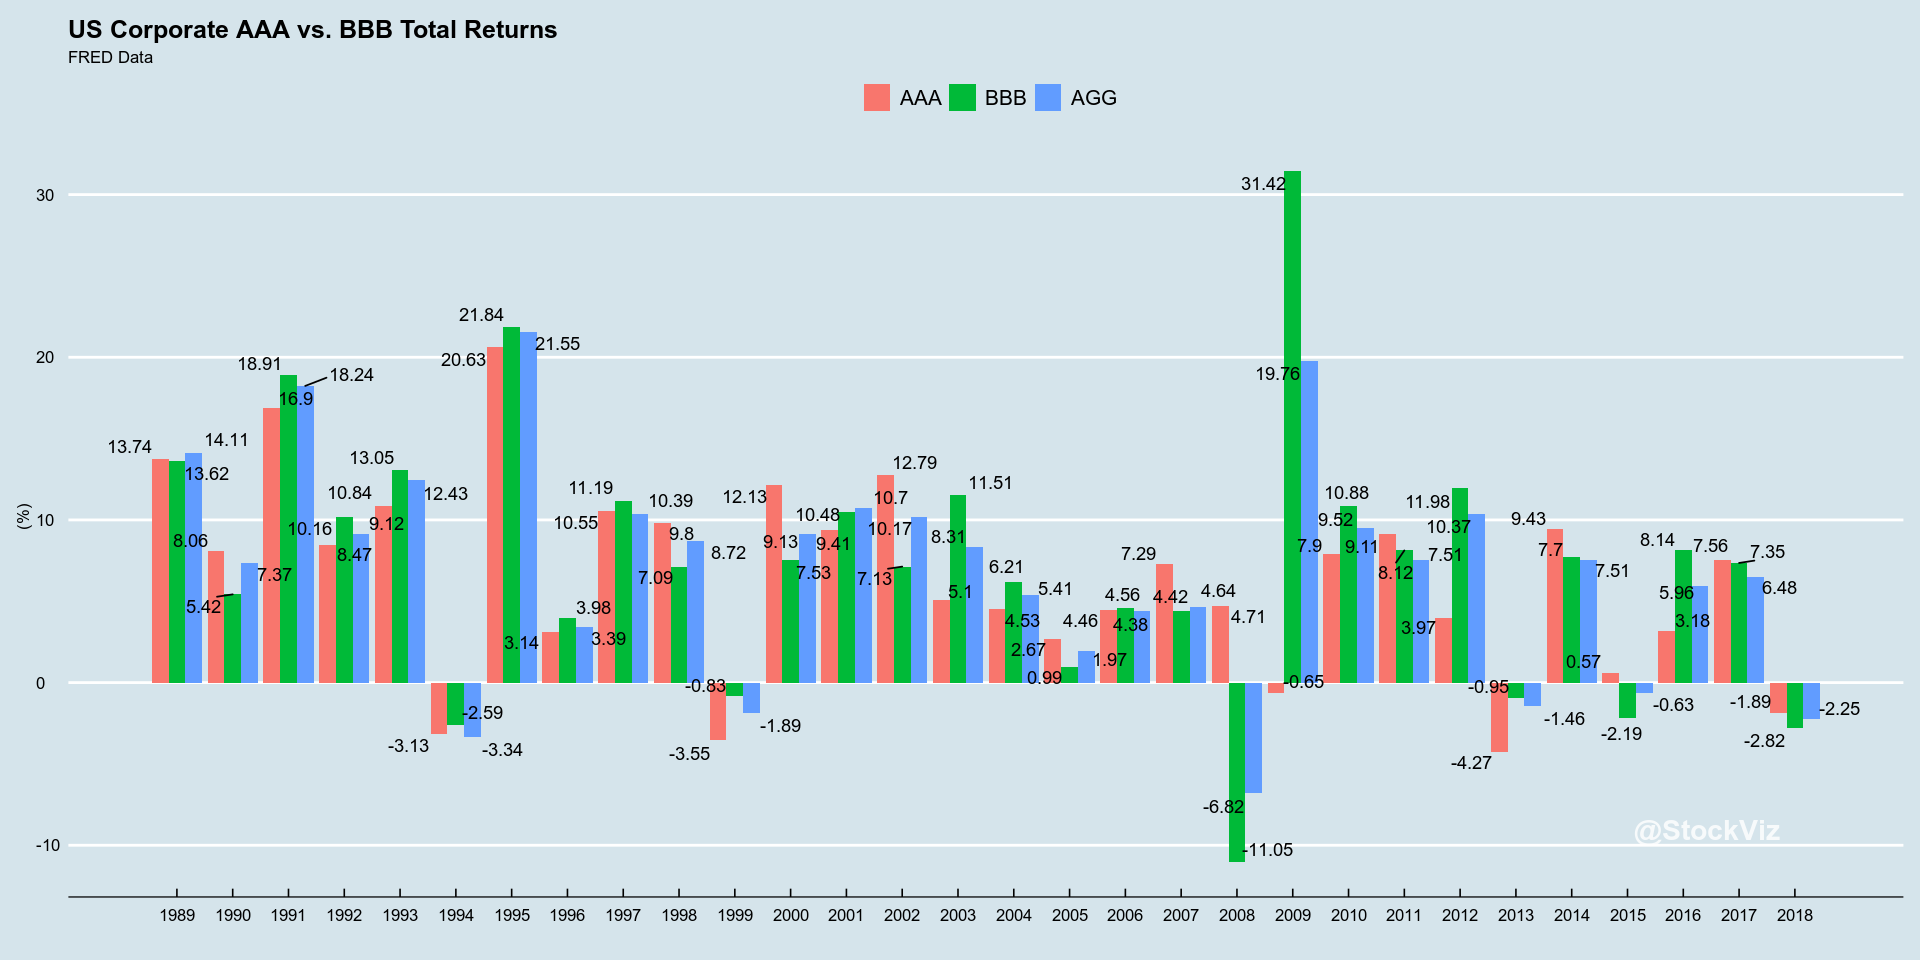

In [22]:
toPlot <- data.frame(bondRetsAnnual)
toPlot$YEAR <- year(index(bondRetsAnnual))
mDf <- melt(toPlot, id='YEAR')

ggplot(mDf, aes(x=YEAR, y=value, fill=variable)) +
    theme_economist() +
    geom_bar(stat="identity", position=position_dodge()) +
    scale_x_continuous(labels=toPlot$YEAR, breaks=toPlot$YEAR) +
    geom_text_repel(aes(label= round(value, 2)), position = position_dodge(0.9)) +
    labs(x='', y='(%)', fill='', title="US Corporate AAA vs. BBB Total Returns", 
         subtitle="FRED Data") +
    annotate("text", x=max(toPlot$YEAR), y=min(mDf$value), 
             label = "@StockViz", hjust=1.1, vjust=-1.1, 
             col="white", cex=6, fontface = "bold", alpha = 0.8)  

This notebook was created using [pluto](https://pluto.studio). Thank you for playing fair!